In [8]:
import pandas as pd
from collections import Counter
from matplotlib import pyplot as plt

### The data here represents 102 runs of a decision tree classifier ##

In [2]:
df = pd.read_csv("decision_tree_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   samples               102 non-null    object 
 1   accuracy              102 non-null    float64
 2   authentic_mislabeled  102 non-null    object 
 3   synthetic_mislabeled  102 non-null    object 
 4   top_10_features       102 non-null    object 
dtypes: float64(1), object(4)
memory usage: 4.1+ KB


In [4]:
df.head()


,samples,accuracy,authentic_mislabeled,synthetic_mislabeled,top_10_features
0,"['ALCOTT_synthetic_combined_31.txt', 'ALCOTT_s...",0.9450,"['Hopkins_58.txt', 'Bronte_138.txt', 'Twain_25...","['AUSTEN_synthetic_combined_69.txt', 'ALCOTT_s...","{'not': 0.4975553895814875, 'which': 0.1362414..."
1,"['ALCOTT_synthetic_combined_99.txt', 'ALCOTT_s...",0.9575,"['Alcott_893.txt', 'Twain_2761.txt', 'Stoker_9...","['AUSTEN_synthetic_combined_165.txt', 'TWAIN_s...","{'of': 0.49142758965687133, 'which': 0.1694313..."
2,"['ALCOTT_synthetic_combined_19.txt', 'ALCOTT_s...",0.9450,"['Austen_1608.txt', 'Twain_2637.txt', 'Chesnut...","['TWAIN_synthetic_combined_36.txt', 'DICKENS_s...","{'have': 0.5005300208270254, 'which': 0.194964..."
3,"['ALCOTT_synthetic_combined_3.txt', 'ALCOTT_sy...",0.9600,"['Hopkins_216.txt', 'Dickens_8162.txt', 'Grigg...","['CHESNUTT_synthetic_combined_178.txt', 'ALCOT...","{'which': 0.49676810009761746, 'said': 0.24824..."
4,"['ALCOTT_synthetic_combined_103.txt', 'ALCOTT_...",0.9575,"['Twain_1755.txt', 'Chesnutt_632.txt', 'Austen...","['ALCOTT_synthetic_combined_78.txt', 'ALCOTT_s...","{'have': 0.5324249522892904, 'which': 0.180356..."


In [36]:
df_sorted = df.sort_values("accuracy", ascending=False).reset_index()
df_sorted.head()

,index,samples,accuracy,authentic_mislabeled,synthetic_mislabeled,top_10_features
0,56,"['ALCOTT_synthetic_combined_109.txt', 'ALCOTT_...",0.9800,"['Bronte_885.txt', 'Alcott_2393.txt']","['TWAIN_synthetic_combined_6.txt', 'TWAIN_synt...","{'of': 0.50280345728033, 'which': 0.1593608637..."
1,101,"['ALCOTT_synthetic_combined_108.txt', 'ALCOTT_...",0.9775,"['Twain_1658.txt', 'Stoker_941.txt', 'Bronte_1...","['TWAIN_synthetic_combined_180.txt', 'TWAIN_sy...","{'of': 0.5093972247470533, 'which': 0.21367856..."
2,11,"['ALCOTT_synthetic_combined_86.txt', 'ALCOTT_s...",0.9725,"['Hopkins_81.txt', 'Chesnutt_487.txt', 'Griggs...","['TWAIN_synthetic_combined_67.txt', 'AUSTEN_sy...","{'of': 0.5168078025272107, 'which': 0.17984813..."
3,85,"['ALCOTT_synthetic_combined_91.txt', 'ALCOTT_s...",0.9725,"['Griggs_89.txt', 'Griggs_67.txt', 'Twain_1360...","['AUSTEN_synthetic_combined_139.txt', 'BRONTE_...","{'of': 0.49402678124721305, 'which': 0.1689102..."
4,46,"['ALCOTT_synthetic_combined_18.txt', 'ALCOTT_s...",0.9700,"['Stoker_649.txt', 'Hopkins_183.txt', 'Twain_2...","['AUSTEN_synthetic_combined_74.txt', 'TWAIN_sy...","{'of': 0.5122370986748519, 'which': 0.14112535..."


In [46]:
from statistics import mean 
accuracy_values = (df['accuracy']).tolist()
print("Mean accuracy for decision tree: " + str(mean(accuracy_values)))
print("Max accuracy for decision tree: " + str(max(accuracy_values)))


Mean accuracy for decision tree: 0.9510294117647059
Max accuracy for decision tree: 0.98


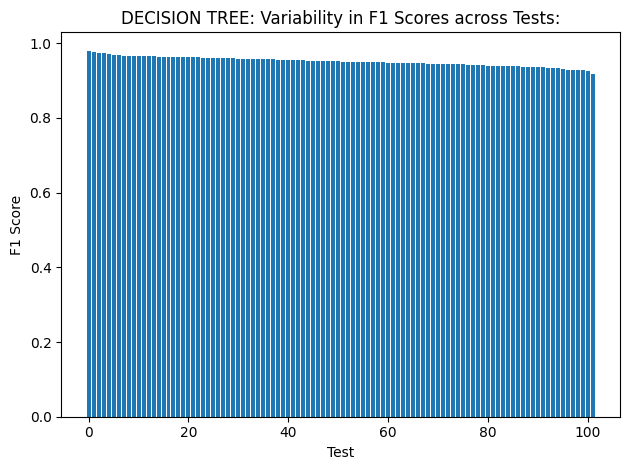

In [40]:
plt.figure()  # Adjust the figure size if necessary
plt.bar(df_sorted.index.values, df_sorted['accuracy'])

# Step 2: Labeling the graph
plt.xlabel('Test')
plt.ylabel('F1 Score')
plt.title('DECISION TREE: Variability in F1 Scores across Tests:')

# Step 3: Show the plot
plt.tight_layout()
plt.show()

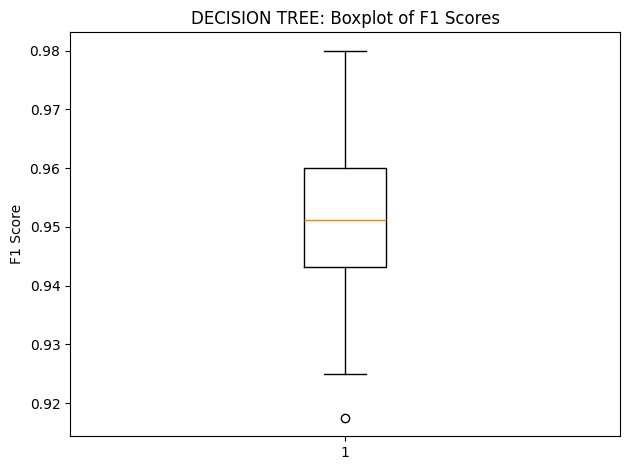

In [41]:
plt.figure()  # Optional: Adjust figure size if necessary
plt.boxplot(df['accuracy'])

# Step 2: Label the graph
plt.ylabel('F1 Score')
plt.title('DECISION TREE: Boxplot of F1 Scores')

# Step 3: Show the plot
plt.tight_layout()
plt.show()

In [5]:
authentic = df['authentic_mislabeled'].tolist()

authentic_mislabeled = []

import ast

# Iterate over each string in the list
for item in authentic:
    # Convert the string representation of the list into an actual list using ast.literal_eval
    sublist = ast.literal_eval(item)
    # Extend the flat_list with elements from the sublist
    authentic_mislabeled.extend(sublist)

author_mislabeled = []

for x in authentic_mislabeled:
    name = x.split("_")[0]
    author_mislabeled.append(name.lower())



string_counts = Counter(author_mislabeled)

# Create a DataFrame from the Counter dictionary
auth_df = pd.DataFrame(list(string_counts.items()), columns=['author', 'Count'])
auth_df = auth_df.sort_values("Count", ascending=False)

In [15]:
len(authentic_mislabeled)

1059

In [16]:
print("Number of times an authentic chunk by an author was labelled synthetic out of 200,000 samples (2000 samples by 100 runs):")

auth_df.head(10)

Number of times an authentic chunk by an author was labelled synthetic out of 200,000 samples (2000 samples by 100 runs):


,author,Count
3,griggs,182
2,twain,167
0,hopkins,155
4,alcott,115
7,chesnutt,93
5,stoker,90
1,bronte,83
9,dickens,70
6,gaskell,52
8,austen,52


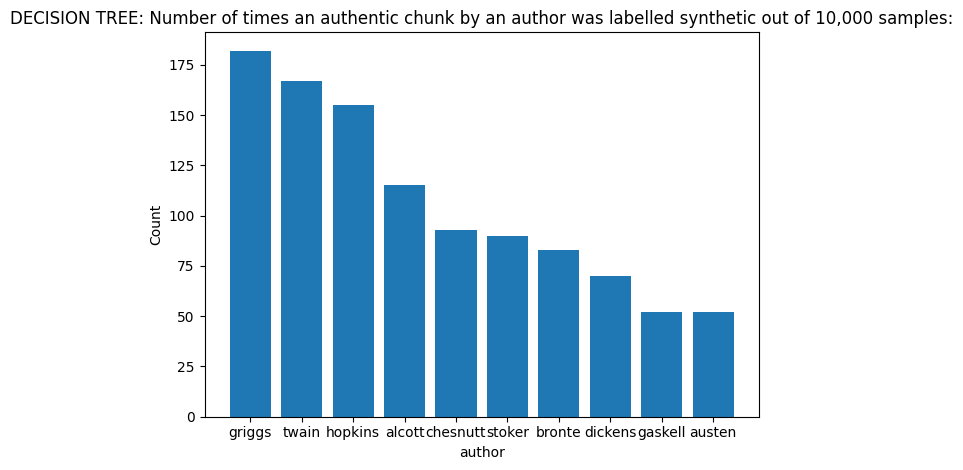

<Figure size 640x480 with 0 Axes>

In [42]:
plt.figure()  # Adjust the figure size if necessary
plt.bar(auth_df['author'], auth_df['Count'])

# Step 2: Labeling the graph
plt.xlabel('author')
plt.ylabel('Count')
plt.title('DECISION TREE: Number of times an authentic chunk by an author was labelled synthetic out of 10,000 samples:')

# Step 3: Show the plot
plt.tight_layout()
plt.show()

plt.savefig('authentic_mislabeled.png', dpi=300)  # Save as PNG with 300 DPI

In [18]:
synthetic = df['synthetic_mislabeled'].tolist()

synthetic_mislabeled = []

import ast

# Iterate over each string in the list
for item in synthetic:
    # Convert the string representation of the list into an actual list using ast.literal_eval
    sublist = ast.literal_eval(item)
    # Extend the flat_list with elements from the sublist
    synthetic_mislabeled.extend(sublist)

author_mislabeled_syn = []

for x in synthetic_mislabeled:
    name = x.split("_")[0]
    author_mislabeled_syn.append(name.lower())

string_counts_syn = Counter(author_mislabeled_syn)

# Create a DataFrame from the Counter dictionary
auth_df_syn = pd.DataFrame(list(string_counts_syn.items()), columns=['author', 'Count'])
auth_df_syn = auth_df_syn.sort_values("Count", ascending=False)

In [20]:
print("Number of times an synthetic chunk by GPT mimicking an author was labelled authentic out of 200,000 samples (2000 samples by 100 runs):")

auth_df_syn.head(10)


Number of times an synthetic chunk by GPT mimicking an author was labelled authentic out of 200,000 samples (2000 samples by 100 runs):


,author,Count
3,twain,310
0,austen,185
1,alcott,114
5,bronte,73
4,stoker,56
7,dickens,56
2,griggs,48
6,gaskell,45
8,hopkins,35
9,chesnutt,17


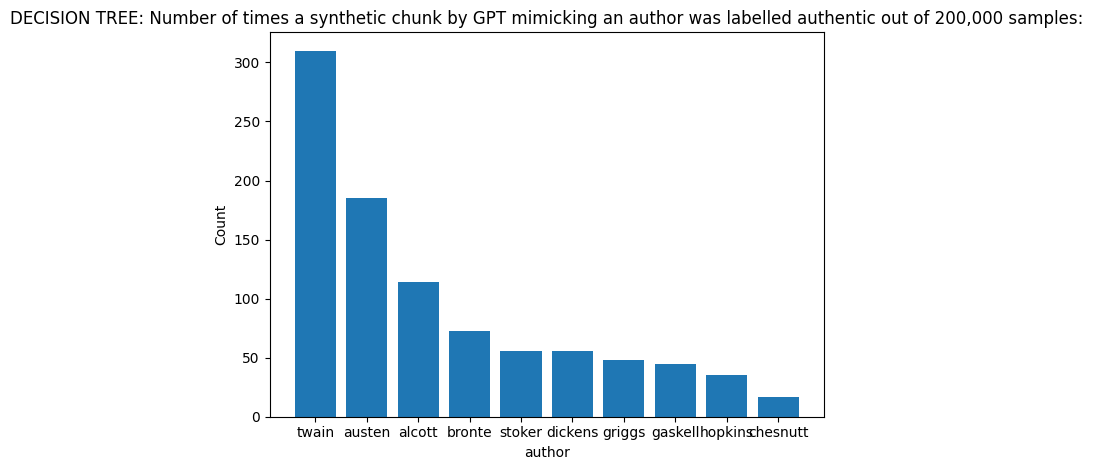

<Figure size 640x480 with 0 Axes>

In [43]:
plt.figure()  # Adjust the figure size if necessary
plt.bar(auth_df_syn['author'], auth_df_syn['Count'])

# Step 2: Labeling the graph
plt.xlabel('author')
plt.ylabel('Count')
plt.title('DECISION TREE: Number of times a synthetic chunk by GPT mimicking an author was labelled authentic out of 200,000 samples:')

# Step 3: Show the plot
plt.tight_layout()
plt.show()

plt.savefig('synthetic_mislabeled.png', dpi=300)  # Save as PNG with 300 DPI

In [23]:
dict_list = []

# Loop through the column, and check if the row is a dictionary or a string
for index, row in df['top_10_features'].items():
    if isinstance(row, str):
        # Convert the string to a dictionary
        row_dict = ast.literal_eval(row)
    elif isinstance(row, dict):
        # If it's already a dictionary, use it directly
        row_dict = row
    else:
        # Skip if the row is neither a string nor a dictionary
        print(f"Row {index} is not a valid type, skipping.")
        continue
    
    # Append the dictionary to the list
    dict_list.append(row_dict)


In [24]:
len(dict_list)

102

In [25]:
all_keys = []

# Loop through each dictionary and extract the keys
for d in dict_list:
    all_keys.extend(d.keys())

# Use Counter to count the occurrences of each key
key_counts = Counter(all_keys)

# Convert the Counter dictionary to a DataFrame
feature_keys_df = pd.DataFrame(list(key_counts.items()), columns=['Key', 'Count'])


In [26]:
feature_keys_df.sort_values("Count", ascending=False)

,Key,Count
1,which,102
3,a,102
2,of,89
10,mean_sen_len,83
11,have,62
...,...,...
47,has,1
44,in,1
87,poor,1
38,will,1


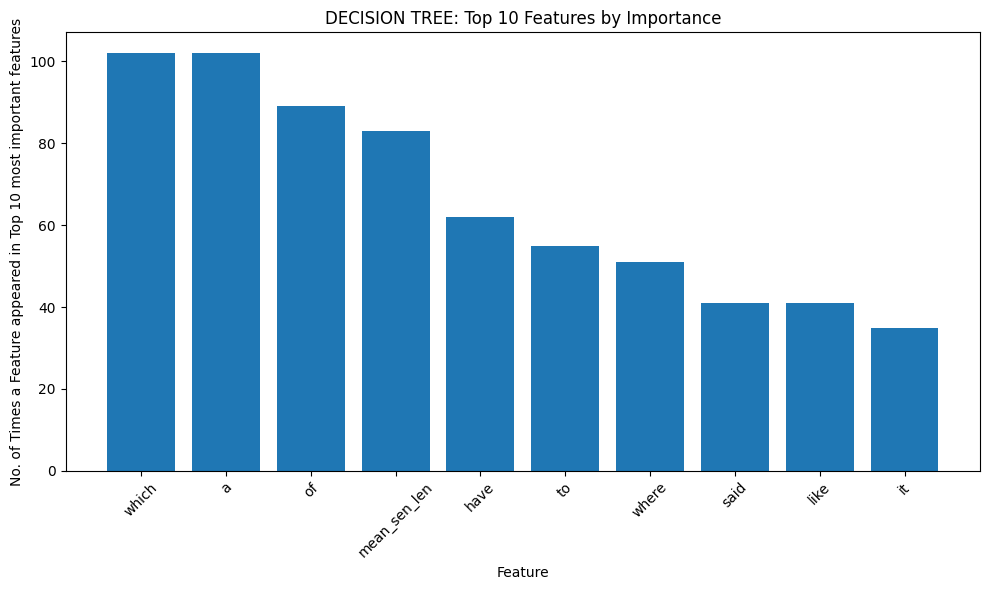

<Figure size 640x480 with 0 Axes>

In [44]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and you want the top 10 rows based on a 'Count' column
top_features_df = feature_keys_df.nlargest(10, 'Count')  # Adjust 'Count' to the column you want to sort by

# Plot a bar chart
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.bar(top_features_df['Key'], top_features_df['Count'])  # Use appropriate column names

# Labeling the graph
plt.xlabel('Feature')
plt.ylabel('No. of Times a Feature appeared in Top 10 most important features')
plt.title('DECISION TREE: Top 10 Features by Importance')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Display the bar chart
plt.tight_layout()
plt.show()

plt.savefig('top_features.png', dpi=300)  # Save as PNG with 300 DPI

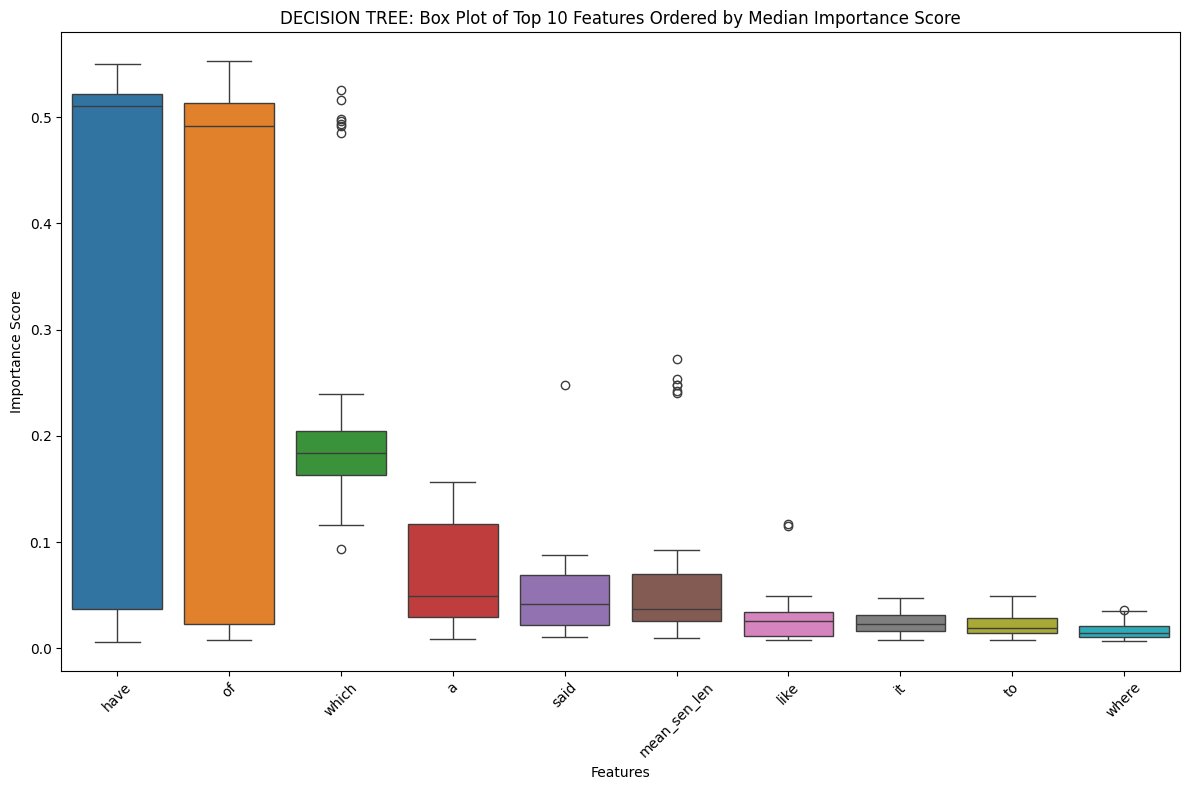

<Figure size 640x480 with 0 Axes>

In [45]:
import seaborn as sns

# Step 2: Get the top 20 keys based on their occurrence
top_10_keys = [k for k, v in key_counts.most_common(10)]

# Step 3: Create a dictionary to store values associated with each key
key_values = {key: [] for key in top_10_keys}

# Step 4: Collect values for each key across all dictionaries
for d in dict_list:
    for key in top_10_keys:
        if key in d:
            key_values[key].append(d[key])

# Step 5: Convert key-values dictionary into a DataFrame for plotting
data = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in key_values.items()]))

medians = data.median().sort_values(ascending=False)
data = data[medians.index]  # Reorder DataFrame columns based on sorted medians

# Step 7: Create a box plot for the top 20 keys ordered by median
plt.figure(figsize=(12, 8))  # Adjust the figure size if necessary
sns.boxplot(data=data)

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('DECISION TREE: Box Plot of Top 10 Features Ordered by Median Importance Score')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the box plot
plt.tight_layout()
plt.show()

plt.savefig('top_features_boxplot.png', dpi=300)  # Save as PNG with 300 DPI

## Exploring top features in full list of chunks ##

## Note to self--need to rethink visualizations here!! ##

In [29]:
master_df = pd.read_csv("master_features_chunks.csv")

In [30]:
master_df.head()

,ID,nation,gender,category,mean_sen_len,male_pronouns,female_pronouns,TTR,lex_density,VADER_sentiment,...,here,again,other,must,after,go,might,too,through,himself
0,Gaskell_1790.txt,British/Irish,female,authentic,17.275862,0.017857,0.040816,0.464286,0.563776,0.9966,...,0.0,0.000000,0.002551,0.000000,0.0,0.005102,0.002551,0.000000,0.000000,0.0
1,Chesnutt_401.txt,American,male,authentic,20.958333,0.018470,0.000000,0.583113,0.635884,-0.9533,...,0.0,0.000000,0.000000,0.000000,0.0,0.002639,0.000000,0.002639,0.000000,0.0
2,Stoker_1737.txt,British/Irish,male,authentic,15.718750,0.007692,0.000000,0.484615,0.546154,0.9476,...,0.0,0.007692,0.000000,0.000000,0.0,0.002564,0.000000,0.000000,0.000000,0.0
3,Alcott_349.txt,American,female,authentic,27.833333,0.009975,0.029925,0.538653,0.578554,0.9879,...,0.0,0.000000,0.002494,0.000000,0.0,0.002494,0.000000,0.000000,0.000000,0.0
4,Alcott_954.txt,American,female,authentic,33.466667,0.006818,0.013636,0.522727,0.527273,0.9990,...,0.0,0.002273,0.002273,0.002273,0.0,0.004545,0.006818,0.000000,0.002273,0.0


In [31]:
master_df.columns.values

array(['ID', 'nation', 'gender', 'category', 'mean_sen_len',
       'male_pronouns', 'female_pronouns', 'TTR', 'lex_density',
       'VADER_sentiment', 'concreteness', 'said', 'mr', 'little', 'time',
       'like', 'know', 'man', 'old', 'hand', 'come', 'miss', 'day',
       'good', 'eye', 'thought', 'way', 'think', 'face', 'sir', 'great',
       'came', 'thing', 'long', 'heart', 'away', 'young', 'went', 'look',
       'word', 'lady', 'life', 'dear', 'head', 'room', 'house', 'looked',
       'night', 'mind', 'shall', 'friend', 'tell', 'place', 'woman',
       'child', 'took', 'door', 'let', 'found', 'mother', 'home', 'got',
       'gentleman', 'father', 'saw', 'better', 'love', 'don', 'going',
       'knew', 'boy', 'people', 'right', 'hope', 'moment', 'year',
       'world', 'voice', 'left', 'poor', 'looking', 'asked', 'girl',
       'felt', 'sat', 'new', 'air', 'oh', 'round', 'want', 'having',
       'soon', 'heard', 'mean', 'stood', 'find', 'light', 'men', 'yes',
       'told', 'hour'

In [32]:
important_features_df = master_df[['ID', 'nation', 'gender', 'category', 'mean_sen_len', 'have', 'of', 'which', 'a', 'said', 'like', 'it', 'to', 'where']]


In [33]:
important_features_df.head()

,ID,nation,gender,category,mean_sen_len,have,of,which,a,said,like,it,to,where
0,Gaskell_1790.txt,British/Irish,female,authentic,17.275862,0.005102,0.020408,0.002551,0.002551,0.005102,0.002551,0.015306,0.040816,0.0
1,Chesnutt_401.txt,American,male,authentic,20.958333,0.002639,0.010554,0.002639,0.023747,0.000000,0.002639,0.005277,0.005277,0.0
2,Stoker_1737.txt,British/Irish,male,authentic,15.718750,0.007692,0.012821,0.000000,0.010256,0.002564,0.000000,0.012821,0.028205,0.0
3,Alcott_349.txt,American,female,authentic,27.833333,0.000000,0.024938,0.002494,0.012469,0.009975,0.002494,0.012469,0.029925,0.0
4,Alcott_954.txt,American,female,authentic,33.466667,0.004545,0.018182,0.002273,0.020455,0.000000,0.004545,0.020455,0.034091,0.0


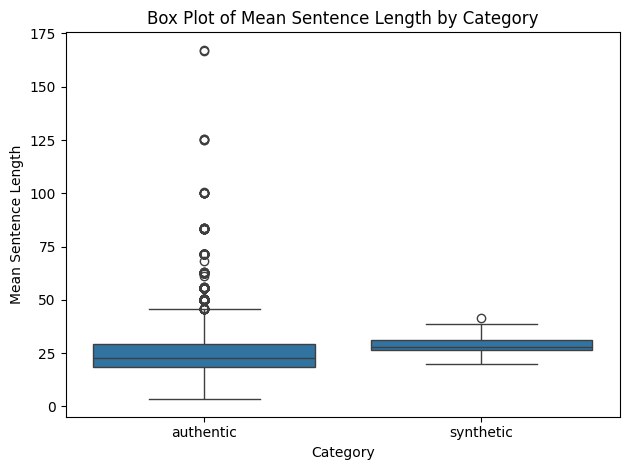

In [34]:
plt.figure()  # Adjust the figure size if needed
sns.boxplot(x='category', y='mean_sen_len', data=important_features_df)

# Step 2: Labeling the plot
plt.xlabel('Category')
plt.ylabel('Mean Sentence Length')
plt.title('Box Plot of Mean Sentence Length by Category')

# Step 3: Show the plot
plt.tight_layout()
plt.show()

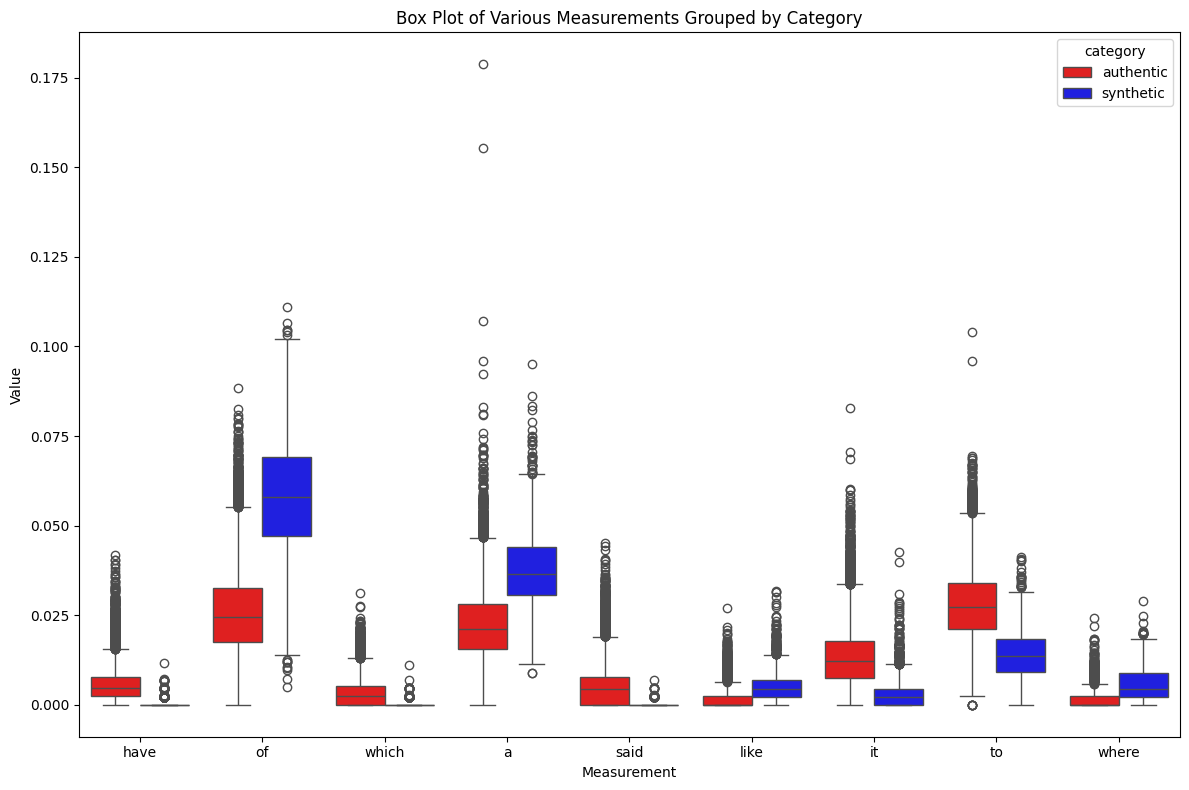

In [35]:
columns_to_plot = ['have', 'of', 'which', 'a', 'said', 'like', 'it', 'to', 'where']

# Step 1: Melt the DataFrame to long format for easier plotting
df_melted = important_features_df.melt(id_vars='category', value_vars=columns_to_plot, 
                    var_name='Measurement', value_name='Value')

# Step 2: Create the box plot for all measurements in one figure
plt.figure(figsize=(12, 8))  # Set figure size
palette = {'synthetic': 'blue', 'authentic': 'red'}  # Color palette for categories

# Create box plot with 'Measurement' on x-axis, 'Value' on y-axis, and color by 'category'
sns.boxplot(x='Measurement', y='Value', hue='category', data=df_melted, palette=palette)

# Step 3: Labeling and title
plt.xlabel('Measurement')
plt.ylabel('Value')
plt.title('Box Plot of Various Measurements Grouped by Category')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()